In [1]:
import numpy as np

In [2]:
import cv2 as cv

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def showImage(imageForShowing):
    plt.figure(figsize = (10, 10))
    plt.imshow(imageForShowing, 'gray')

In [5]:
def showImages(image1, image2):
    f = plt.figure(figsize = (10, 10))
    f.add_subplot(1, 1, 1)
    plt.imshow(image1, 'gray')
    f.add_subplot(1, 1, 1)
    plt.imshow(image2, 'gray')
    plt.show(block=True)

In [6]:
img = cv.imread("skeleton2.png", 0)
img = img - 28

In [7]:
print(img[0, 0])

0


In [8]:
shapeOfImg = img.shape
print(shapeOfImg)

(618, 382)


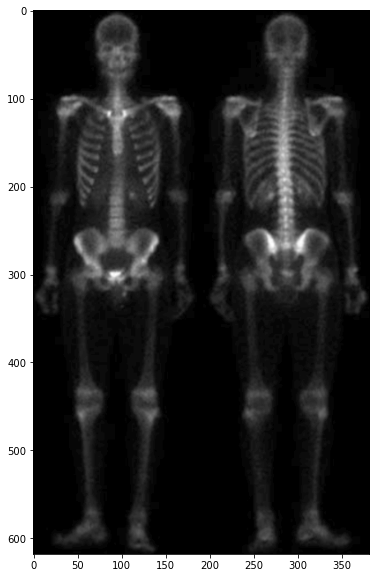

In [9]:
showImage(img)

In [10]:
print(img[100, 100])

92


In [11]:
def ApplyMask(image, mask, maskSize, koef):
    step = maskSize // 2    
    result = np.zeros(shapeOfImg, dtype = np.int16)
    for m in range(shapeOfImg[0] - 2 * step):
        for n in range(shapeOfImg[1] - 2 * step):
            sum = 0
            for i in range (-step, step + 1):                
                for j in range(-step, step + 1):                    
                    sum = sum + image[step + m + i, step + n + j] * mask[i + step, j + step]
            result[m, n] = int(sum * koef)
    return result

In [12]:
def ApplyLimits(image):
    for i in range(shapeOfImg[0]):
        for j in range(shapeOfImg[1]):
            if (image[i, j] < 0):
                image[i, j] = 0
            if (image[i, j] > 255):
                image[i, j] = 255  
    return image

In [13]:
laplaccianMask = np.array([[-1, -1, -1],
                           [-1, 8, -1],
                           [-1, -1, -1]])
print(laplaccianMask)

[[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


In [14]:
laplassianMaskSize = 3
laplassianKoef = 1

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
154
-99


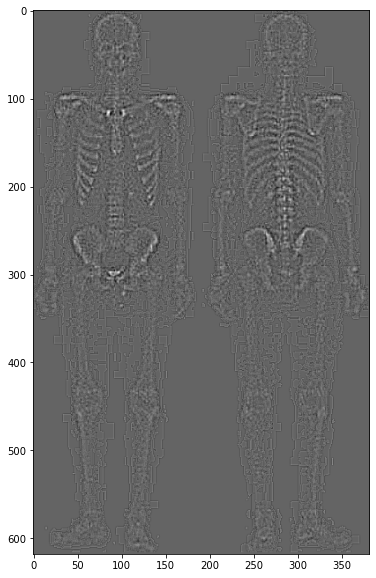

In [15]:
myLaplaccianImage = ApplyMask(img, laplaccianMask, laplassianMaskSize, laplassianKoef)
showImage(myLaplaccianImage)
print(myLaplaccianImage)
print(myLaplaccianImage.max())
print(myLaplaccianImage.min())

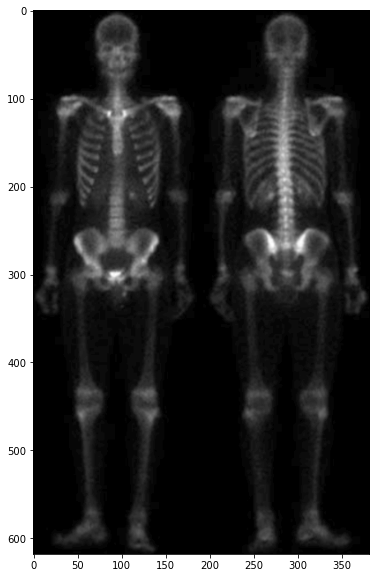

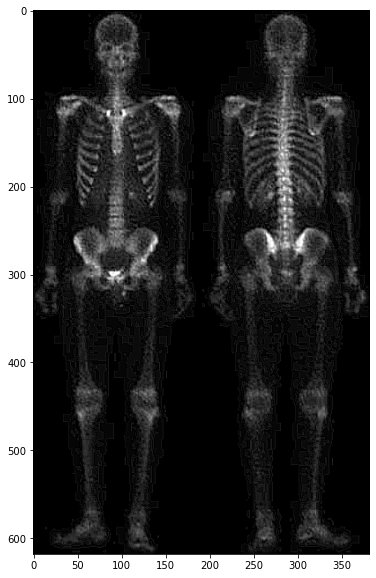

In [16]:
resultAfterSummation = img + myLaplaccianImage
resultAfterSummation = ApplyLimits(img + myLaplaccianImage)
showImage(img)
showImage(resultAfterSummation)

In [17]:
def ApplySobel(image):       
    result = np.zeros(shapeOfImg, dtype = np.int16)
    mask1 = np.array([[-1, -2, -1],
                      [0, 0, 0], 
                      [1, 2, 1]])
    mask2 = np.array([[-1, 0, 1],
                      [-2, 0, 2], 
                      [-1, 0, 1]])
    maskSize = 3
    step = maskSize // 2 
    for m in range(shapeOfImg[0] - 2 * step):
        for n in range(shapeOfImg[1] - 2 * step):
            gx = 0
            for i in range (-1, 2):
                for j in range(-1, 2):
                    gx = gx + image[step + m + i, step + n + j] * mask1[i + step, j + step]            
            gx = abs(gx)
            gy = 0
            for i in range (-1, 2):
                for j in range(-1, 2):
                    gy = gy + image[step + m + i, step + n + j] * mask2[i + step, j + step]            
            gy = abs(gy)
            s = int(gx + gy)                    
            result[m, n] = s            
    return result

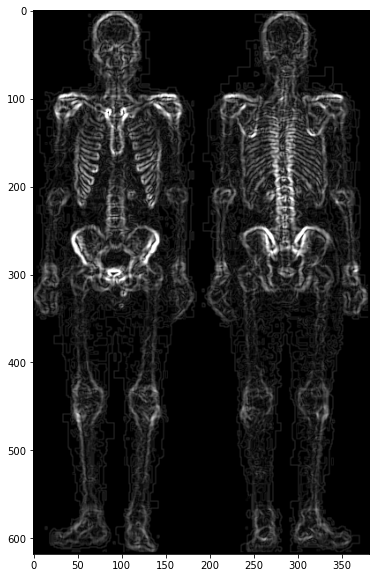

In [18]:
sobelImage = ApplySobel(img)
sobelImage = ApplyLimits(sobelImage)
showImage(sobelImage)

In [19]:
averageFilterMask = np.array([[1, 1, 1, 1, 1],
                              [1, 1, 1, 1, 1], 
                              [1, 1, 1, 1, 1],
                              [1, 1, 1, 1, 1],
                              [1, 1, 1, 1, 1]])
averageFilterMaskSize = 5
averageFilterKoef = 0.04

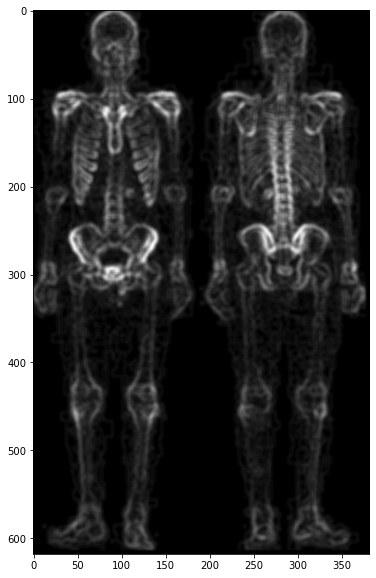

In [20]:
bluredSobel = ApplyMask(sobelImage, averageFilterMask, averageFilterMaskSize, averageFilterKoef)
bluredSobel = ApplyLimits(bluredSobel)
showImage(bluredSobel)

In [21]:
print(bluredSobel.max())
print(bluredSobel.min())

243
0


In [22]:
def MultiplyTwoImages(image, maskImage):
    result = np.zeros(shapeOfImg, dtype = np.int16)
    for i in range(shapeOfImg[0]):
        for j in range(shapeOfImg[1]):
            if (maskImage[i, j] > 0):
                koef = 1
            else:
                koef = 0
            result[i, j] = image[i, j] * koef 
    print(result.max())
    print(result.min())
    return result

154
-99


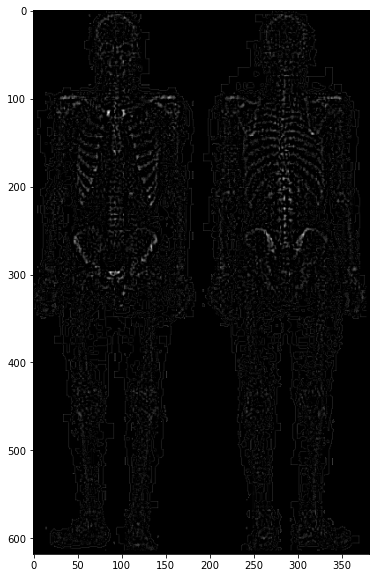

In [23]:
multiplicationResult = MultiplyTwoImages(myLaplaccianImage, bluredSobel)
multiplicationResult = ApplyLimits(multiplicationResult)
showImage(ApplyLimits(multiplicationResult))

In [24]:
def showImages(image1, image2):
    plt.figure(figsize = (15, 20))
    plt.subplot(1,2,1)
    plt.imshow(image1, cmap = 'gray')
    plt.title('Original')
    plt.subplot(1,2,2)
    plt.imshow(image2, cmap = 'gray')
    plt.title('Result')

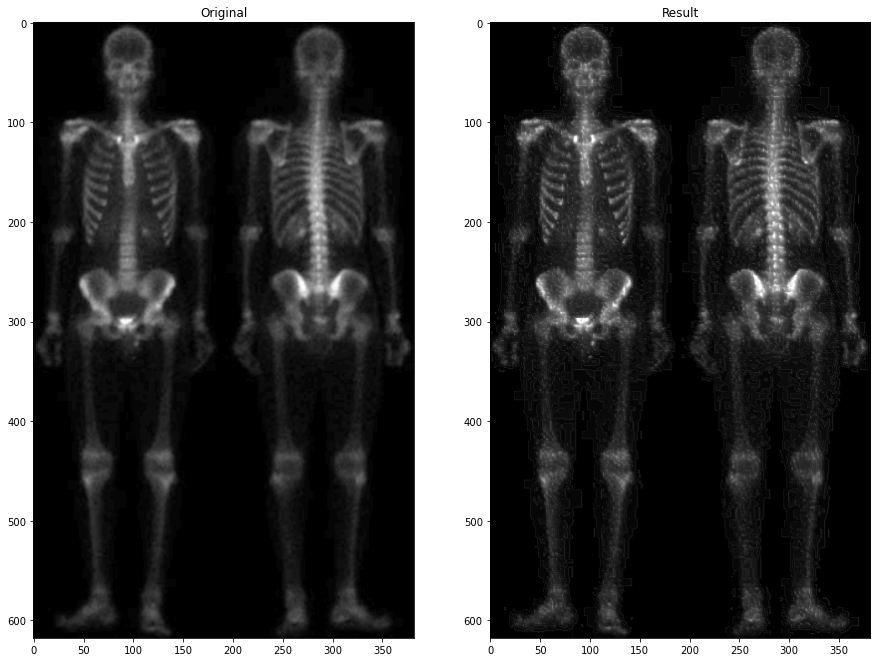

In [25]:
resultOfProgram = multiplicationResult + img
resultOfProgram = ApplyLimits(resultOfProgram)
showImages(img, resultOfProgram)

#imageForDemonstration = np.concatenate((img, resultOfProgram), axis = 1)
#showImage(imageForDemonstration)

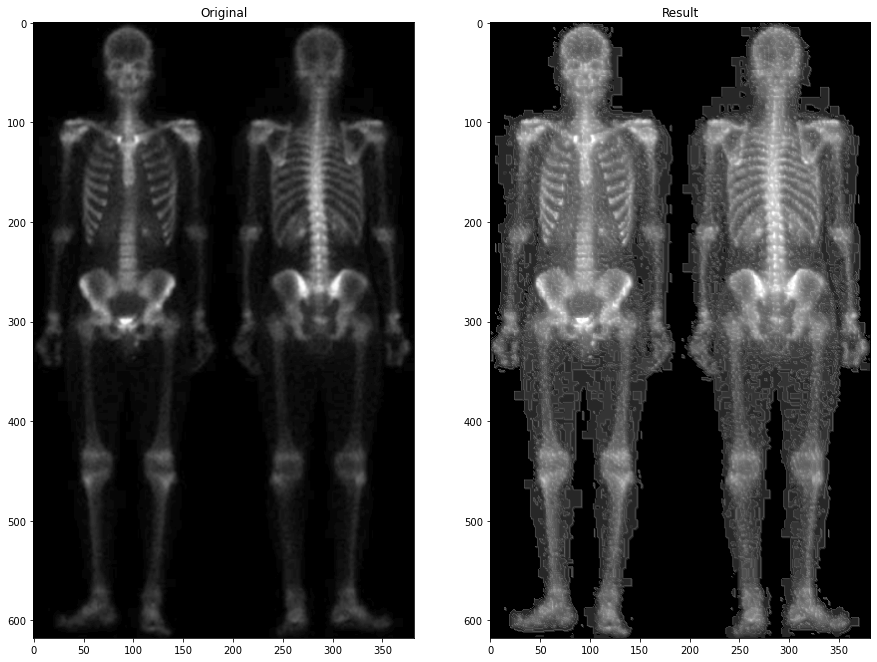

In [26]:
#Гамма-коррекция
c = 1
j = 0.5
l = lambda a : c * pow(a, j)
result = l(resultOfProgram)
showImages(img, result)